In [81]:
# pacotes
import pandas as pd
import numpy as np
import os
import openpyxl
from openpyxl import load_workbook
import seaborn as sn
from itertools import permutations, product
import matplotlib.pyplot as mplt
import scipy.stats as stats
from tabulate import tabulate
from scipy.stats import chi2_contingency 
import statsmodels.api as sm
import statsmodels.tools as smt
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [86]:
# setar diretorio dos cadernos (codigo caso puxe os arquivos com todas as colunas originais do ibge)
diretorio = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\dados gradilene\dados'
diretorio = diretorio.replace('\\', '/')

os.chdir(diretorio)
os.getcwd()

'C:\\Users\\Computadores Gamer\\OneDrive\\Área de Trabalho\\dados gradilene\\dados'

In [87]:
#### Cadernos IBGE

#### DOMICILIO
# largura do txt
larguras = [2,4,1,9,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14,14,1]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "V0201", "V0202",
            "V0203", "V0204", "V0205", "V0206", "V0207",
            "V0208", "V0209", "V02101", "V02102",
            "V02103", "V02104", "V02105", "V02111",
            "V02112", "V02113", "V0212", "V0213",
            "V02141", "V02142", "V0215", "V02161",
            "V02162", "V02163", "V02164", "V0217",
            "V0219", "V0220", "V0221", "PESO",
            "PESO_FINAL", "V6199"]

# leitura dos dados
DOMICILIO = pd.read_fwf(
    os.path.join(diretorio, "DOMICILIO.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

##### CONDICOES_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,1,6,5,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,14,14,10]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V6101", "V6102", "V6103", "V61041", "V61042",
            "V61043", "V61044", "V61045", "V61046",
            "V61051", "V61052", "V61053", "V61054",
            "V61055", "V61056", "V61057", "V61058",
            "V61061", "V61062", "V61063", "V61064",
            "V61065", "V61066", "V61067", "V61068",
            "V61069", "V610610", "V610611", "V61071",
            "V61072", "V61073", "V6108", "V6109",
            "V6110", "V6111", "V6112", "V6113", "V6114",
            "V6115", "V6116", "V6117", "V6118", "V6119",
            "V6120", "V6121", "PESO", "PESO_FINAL",
            "RENDA_TOTAL"]

# leitura dos dados
CONDICOES_VIDA = pd.read_fwf(
    os.path.join(diretorio, "CONDICOES_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)


##### MORADOR_QUALI_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,20,20,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,2,20,20,14,14]

# nome das colunas
colunas = ["UF","ESTRATO_POF","TIPO_SITUACAO_REG","COD_UPA",
            "NUM_DOM","NUM_UC","COD_INFORMANTE","CONTAGEM_PONDERADA",
            "FUNCAO_PERDA","V201","V202","V204","V205","V206",
            "V207","V208","V209","V210","V211","V212","V214","V215",
            "V216","V217","V301","V302","V303","V304","V305","V306",
            "V307","V308","V401","V402","V403","V501","V502","V503",
            "V504","V505","V506","V601","V602","V603","V604","V605",
            "V606","V607","V608","V609","V610","V611","V701","V702",
            "V703","V704","V801","V802","V901","V902","GRANDE_REGIAO",
            "C1","C2","C3","C4","C5","C6","C7","RENDA_DISP_PC",
            "RENDA_DISP_PC_SS","PESO","PESO_FINAL"]

# leitura dos dados
MORADOR_QUALI_VIDA = pd.read_fwf(
    os.path.join(diretorio, "MORADOR_QUALI_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)


#### MORADOR
# largura do txt
larguras = [2,4,1,9,2,1,2,2,1,2,2,4,3,1,1,
            1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,
            2,1,2,14,14,10,1,20,20,20,20]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V0306", "V0401", "V04021", "V04022", "V04023",
            "V0403", "V0404", "V0405", "V0406", "V0407",
            "V0408", "V0409", "V0410", "V0411", "V0412",
            "V0413", "V0414", "V0415", "V0416",
            "V041711", "V041712", "V041721", "V041722",
            "V041731", "V041732", "V041741", "V041742",
            "V0418", "V0419", "V0420", "V0421", "V0422",
            "V0423", "V0424", "V0425", "V0426", "V0427",
            "V0428", "V0429", "V0430", "ANOS_ESTUDO",
            "PESO", "PESO_FINAL", "RENDA_TOTAL",
            "NIVEL_INSTRUCAO", "RENDA_DISP_PC","RENDA_MONET_PC",
            "RENDA_NAO_MONET_PC","DEDUCAO_PC" ]

# leitura dos dados
MORADOR = pd.read_fwf(
    os.path.join(diretorio, "MORADOR.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)





In [88]:
# deu a mesma coisa que o codigo dos big data
# inicial = DOMICILIO.merge(MORADOR, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how = 'left')
# inicial2 = inicial.merge(CONDICOES_VIDA, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how='left')
# base = inicial2.merge(MORADOR_QUALI_VIDA, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how = 'left')


# inicial = DOMICILIO.merge(MORADOR, how = 'left')
# inicial2 = inicial.merge(CONDICOES_VIDA,  how='left')
# base = inicial2.merge(MORADOR_QUALI_VIDA,  how = 'left')



In [89]:
# verificando merge, juntando as colunas chaves de cada caderno para formar chave primária
# DOMICILIO['chave_primaria'] = DOMICILIO['UF'].astype(str) + '-' + DOMICILIO['ESTRATO_POF'].astype(str) + '-' + DOMICILIO['TIPO_SITUACAO_REG'].astype(str) + '-' + DOMICILIO['COD_UPA'].astype(str)
# MORADOR['chave_primaria'] = MORADOR['UF'].astype(str) + '-' + MORADOR['ESTRATO_POF'].astype(str) + '-' + MORADOR['TIPO_SITUACAO_REG'].astype(str) + '-' + MORADOR['COD_UPA'].astype(str)
# CONDICOES_VIDA['chave_primaria'] = CONDICOES_VIDA['UF'].astype(str) + '-' + CONDICOES_VIDA['ESTRATO_POF'].astype(str) + '-' + CONDICOES_VIDA['TIPO_SITUACAO_REG'].astype(str) + '-' + CONDICOES_VIDA['COD_UPA'].astype(str)
# MORADOR_QUALI_VIDA['chave_primaria'] = MORADOR_QUALI_VIDA['UF'].astype(str) + '-' + MORADOR_QUALI_VIDA['ESTRATO_POF'].astype(str) + '-' + MORADOR_QUALI_VIDA['TIPO_SITUACAO_REG'].astype(str) + '-' + MORADOR_QUALI_VIDA['COD_UPA'].astype(str)


# a = DOMICILIO.merge(MORADOR, on = ['chave_primaria'], how='left')
# b = CONDICOES_VIDA.merge(a, on = ['chave_primaria'], how='left')
# c = MORADOR_QUALI_VIDA.merge(b, on = ['chave_primaria'], how='left')



In [90]:
# #### Merges 
bigdata = pd.merge(DOMICILIO, MORADOR, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how= 'left')
bigdata2 = pd.merge(CONDICOES_VIDA, bigdata, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how='right')
base = pd.merge(MORADOR_QUALI_VIDA, bigdata2, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how='right')


# removendo colunas duplicadas, ou seja, com sufixo '_x' e '_y'
# '$' indica trecho no final da palavra
colunas_del_x = base.filter(regex=f'_x$').columns
base = base.drop(colunas_del_x, axis=1)

colunas_del_y = base.filter(regex=f'_y$').columns
base = base.drop(colunas_del_y, axis=1)

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\2397746311.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PESO_y', 'PESO_FINAL_y'} in the result is deprecated and will raise a MergeError in a future version.
  base = pd.merge(MORADOR_QUALI_VIDA, bigdata2, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how='right')


In [91]:
# tratamento da 'base'

# testando o metodo dropna(how = 'all')
# df_teste = pd.DataFrame({'a': [np.nan,2,3],
#                          'b': [np.nan,np.nan,7],
#                          'c':[np.nan,np.nan,np.nan],
#                          'd':[4,5,6]})
# print(df_teste)
# df = df_teste.dropna()
# print(df)

# excluindo todas as linhas que possuem tudo 'nan'
base = base.dropna(how = 'all') 


# tratando valores nan em RENDA_MONET_PC como zero
for i in range(len(base['UF'])):
    if pd.isna(base['RENDA_MONET_PC'][i]):
       base['RENDA_MONET_PC'][i]=float(0) 

print(base['RENDA_MONET_PC'].isna().unique())


for i in range(len(base['UF'])):
    if pd.isna(base['V6199'][i]):
       base['V6199'][i]='teste' 

print(base['V6199'].unique())


for i in range(len(base['UF'])):
    if pd.isna(base['V6101'][i]):
       base['V6101'][i]='teste'

print(base['V6101'].unique())


for i in range(len(base['UF'])):
    if pd.isna(base['V61041'][i]):
       base['V61041'][i]='teste' 

print(base['V61041'].unique())


# aqui tem na
for i in range(len(base['UF'])):
    if pd.isna(base['V0212'][i]):
       base['V0212'][i]='existe na' 

print(base['V0212'].unique())



for i in range(len(base['UF'])):
    if pd.isna(base['V0213'][i]):
       base['V0213'][i]='existe na' 

print(base['V0213'].unique())


for i in range(len(base['UF'])):
    if pd.isna(base['V0220'][i]):
       base['V0220'][i]='existe na' 

print(base['V0220'].unique())



# retirando linha da variavel 'V0212' que possui na
base = base.loc[base['V0212'] != 'existe na']


# reindexando a base
# com as linhas deletadas os indíces ficam fora de ordem e isso pode dar problema nos loops seguintes
base.reset_index(drop=True, inplace=True) 






C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\2904707184.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['RENDA_MONET_PC'][i]=float(0)


[False]
[1 2 3 4]
[5 3 2 4 1 6]
[1 2 3]


C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\2904707184.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['V0212'][i]='existe na'


[2.0 3.0 1.0 5.0 'existe na' 4.0]
[1 3 4 2 5 6]
[1 2]


In [92]:
#### Criação de variáveis dependentes - parte 1


# var_depend1
# MORADOR['RENDA_MONET_PC']
# menor ou igual a 1/4 de SM = pobre
# acima de 1/4 de SM = não pobre
# SM (2017) = 937 


corte_sm = 937/4

base['rdpc'] = pd.Series()

for i in range(len(base['UF'])):
    if base['RENDA_MONET_PC'][i] <= corte_sm:
        base['rdpc'][i] = 1
    else:
        base['rdpc'][i] = 0
        

# grafico1 = sn.countplot(base, x='var_depend1')
# porcentagem_pobre = base['var_depend1'].value_counts()['pobre']/len(base['var_depend1'])
# porcentagem_naopobre = 1 - porcentagem_pobre
# print(base['var_depend1'].value_counts(), f'% pobre:{porcentagem_pobre}', f'% nao pobre:{porcentagem_naopobre}') 

# var_depend2 
# DOMICILIO['V6199']
# 1 – Segurança = não pobre
# 2 – Insegurança leve = pobre
# 3 – Insegurança moderada = pobre
# 4 – Insegurança grave = pobre


base['seg_alimentar'] = pd.Series()

for i in range(len(base['V6199'])):
    if base['V6199'][i] == 1:
        base['seg_alimentar'][i] = 0
    elif base['V6199'][i]==2:
        base['seg_alimentar'][i] = 1
    elif base['V6199'][i]==3:
        base['seg_alimentar'][i] = 1
    elif base['V6199'][i]==4:
        base['seg_alimentar'][i] = 1
    

# grafico2 = sn.countplot(base, x='var_depend2')
# porcentagem_pobre = base['var_depend2'].value_counts()['pobre']/len(base['var_depend2'])
# porcentagem_naopobre = 1 - porcentagem_pobre
# print(base['var_depend2'].value_counts(), f'% pobre:{porcentagem_pobre}', f'% nao pobre:{porcentagem_naopobre}')

# var_depend3.1_inicial
# CONDICOES_VIDA['V6101']
# 1 – Muita dificuldade = pobre
# 2 – Dificuldade = pobre
# 3 – Alguma dificuldade = não pobre
# 4 – Alguma facilidade = não pobre
# 5 – Facilidade = não pobre
# 6 – Muita facilidade = não pobre


base['var_depend3.1_inicial'] = pd.Series()

for i in range(len(base['UF'])):
    if base['V6101'][i] == 1:
        base['var_depend3.1_inicial'][i] = 'pobre'
    elif base['V6101'][i]==2:
        base['var_depend3.1_inicial'][i]  = 'pobre'
    elif base['V6101'][i]==3:
        base['var_depend3.1_inicial'][i]  = 'não pobre'
    elif base['V6101'][i]==4:
        base['var_depend3.1_inicial'][i]  = 'não pobre'
    elif base['V6101'][i]==5:
        base['var_depend3.1_inicial'][i]  = 'não pobre'
    elif base['V6101'][i]==6:
        base['var_depend3.1_inicial'][i]  = 'não pobre'
    
 
# sn.countplot(CONDICOES_VIDA, x='var_depend3.1_inicial')
# print(CONDICOES_VIDA['var_depend3.1_inicial'].value_counts())

# var_depend3.2_inicial
# CONDICOES_VIDA['V61041']
# 1 - Bom = não pobre
# 2 - Satisfatório = não pobre
# 3 - Ruim = pobre

base['var_depend3.2_inicial'] = pd.Series()

for i in range(len(base['UF'])):
    if base['V61041'][i] == 1:
        base['var_depend3.2_inicial'][i] = 'não pobre'
    elif base['V61041'][i]==2:
        base['var_depend3.2_inicial'][i]  = 'não pobre'
    elif base['V61041'][i]==3:
        base['var_depend3.2_inicial'][i]  = 'pobre'

    
 
# sn.countplot(base, x='var_depend3.2_inicial')
# print(base['var_depend3.2_inicial'].value_counts())


# var_depend4.1_inicial
# DOMICILIO['V0212']
# 1 – Rede geral, rede pluvial ou fossa ligada à rede = não pobre
# 2 – Fossa não ligada à rede = pobre
# 3 – Vala = pobre
# 4 – Rio, lago ou mar = pobre
# 5 – Outra forma = pobre

base['var_depend4.1_inicial'] = pd.Series()

for i in range(len(base['UF'])):
    if base['V0212'][i] == 1:
        base['var_depend4.1_inicial'][i] = 'não pobre'
    elif base['V0212'][i]==2:
        base['var_depend4.1_inicial'][i]  = 'pobre'
    elif base['V0212'][i]==3:
        base['var_depend4.1_inicial'][i]  = 'pobre'
    elif base['V0212'][i]==4:
        base['var_depend4.1_inicial'][i]  = 'pobre'
    elif base['V0212'][i]==5:
        base['var_depend4.1_inicial'][i]  = 'pobre'

  
 
# sn.countplot(DOMICILIO, x='var_depend4.1_inicial')
# print(DOMICILIO['var_depend4.1_inicial'].value_counts())


# var_depend4.2_inicial
# DOMICILIO['V0213']
# 1 – Coletado diretamente por serviço de limpeza = não pobre
# 2 – Coletado em caçamba de serviço de limpeza = não pobre
# 3 – Queimado (na propriedade) = pobre
# 4 – Enterrado (na propriedade) = pobre
# 5 – Jogado em terreno baldio ou logradouro = pobre
# 6 – Outro destino = pobre


base['var_depend4.2_inicial'] = pd.Series()

for i in range(len(base['V6199'])):
    if base['V0213'][i] == 1:
        base['var_depend4.2_inicial'][i] = 'não pobre'
    elif base['V0213'][i]==2:
        base['var_depend4.2_inicial'][i]  = 'pobre'
    elif base['V0213'][i]==3:
        base['var_depend4.2_inicial'][i]  = 'pobre'
    elif base['V0213'][i]==4:
        base['var_depend4.2_inicial'][i]  = 'pobre'
    elif base['V0213'][i]==5:
        base['var_depend4.2_inicial'][i]  = 'pobre'
    elif base['V0213'][i]==6:
        base['var_depend4.2_inicial'][i]  = 'pobre'

    
 
# sn.countplot(DOMICILIO, x='var_depend4.2_inicial')
# print(DOMICILIO['var_depend4.2_inicial'].value_counts())


# var_depend4.3_inicial
# DOMICILIO['V0220']
# 1 – Sim = não pobre
# 2 – Não = pobre

base['var_depend4.3_inicial'] = pd.Series()

for i in range(len(base['V6199'])):
    if base['V0220'][i] == 1:
        base['var_depend4.3_inicial'][i] = 'não pobre'
    elif base['V0220'][i]==2:
        base['var_depend4.3_inicial'][i]  = 'pobre'
    
 
# sn.countplot(DOMICILIO, x='var_depend4.3_inicial')
# print(DOMICILIO['var_depend4.3_inicial'].value_counts())



C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\33477192.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['rdpc'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\33477192.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['rdpc'][i] = 0
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\33477192.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['rdpc'][i] = 1
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\3347

In [93]:
#### Criação váriaveis dependentes - parte 2

# score variavel dependente do grupo 3
# 3
# Pontuação:
# 0 - não pobre
# 1 - pobre
# 2 - pobre


# gerando permutações 3
lista = ['não pobre', 'pobre']
permutas_3 = []

for i in product(lista, repeat=2):
    permutas_3.append(i)
print(permutas_3)

# [('não pobre', 'não pobre') = 0
# ('não pobre', 'pobre') = 1
# ('pobre', 'não pobre') = 1
# ('pobre', 'pobre')] = 2

   
base['subjetividade'] = pd.Series()
for i in range(len(base['UF'])):
    if base['var_depend3.1_inicial'][i] =='não pobre' and base['var_depend3.2_inicial'][i] == 'não pobre':
        base['subjetividade'][i] = 0
        
    elif base['var_depend3.1_inicial'][i] =='pobre' and base['var_depend3.2_inicial'][i] == 'pobre':
        base['subjetividade'][i]  = 1
    
    else:
        base['subjetividade'][i]  = 1

 
# grafico3 = sn.countplot(base, x='var_depend3')
# print(base['subjetividade'].value_counts())



# score variavel dependente do grupo 4
# Pontuação:
# 0 - não pobre
# 1 - não pobre
# 2 - pobre
# 3 - pobre


# gerando permutações 4    
lista = ['não pobre', 'pobre']
permutas_4 = []

for i in product(lista, repeat=3):
    permutas_4.append(i)
print(permutas_4)
    
# ('não pobre', 'não pobre', 'não pobre') = não pobre
# ('não pobre', 'não pobre', 'pobre') = não pobre
# ('não pobre', 'pobre', 'não pobre') = não pobre
# ('não pobre', 'pobre', 'pobre') = pobre
# ('pobre', 'não pobre', 'não pobre') = não pobre
# ('pobre', 'não pobre', 'pobre') = pobre
# ('pobre', 'pobre', 'não pobre') = pobre
# ('pobre', 'pobre', 'pobre') = pobre


base['serv_essenciais'] = pd.Series()

for i in range(len(base['V6199'])):
    if base['var_depend4.1_inicial'][i]=='não pobre' and base['var_depend4.2_inicial'][i]=='não pobre' and base['var_depend4.3_inicial'][i]=='não pobre':
        base['serv_essenciais'][i]=0
        
    elif base['var_depend4.1_inicial'][i]=='não pobre' and base['var_depend4.2_inicial'][i]=='não pobre' and base['var_depend4.3_inicial'][i]=='pobre':
        base['serv_essenciais'][i]=0
    
    elif base['var_depend4.1_inicial'][i]=='não pobre' and base['var_depend4.2_inicial'][i]=='pobre' and base['var_depend4.3_inicial'][i]=='não pobre':
        base['serv_essenciais'][i]=0
        
    elif base['var_depend4.1_inicial'][i]=='não pobre' and base['var_depend4.2_inicial'][i]=='pobre' and base['var_depend4.3_inicial'][i]=='pobre':
        base['serv_essenciais'][i]=1
        
    elif base['var_depend4.1_inicial'][i]=='pobre' and base['var_depend4.2_inicial'][i]=='não pobre' and base['var_depend4.3_inicial'][i]=='não pobre':
        base['serv_essenciais'][i]=0
        
    elif base['var_depend4.1_inicial'][i]=='pobre' and base['var_depend4.2_inicial'][i]=='não pobre' and base['var_depend4.3_inicial'][i]=='pobre':
        base['serv_essenciais'][i]=1
        
    elif base['var_depend4.1_inicial'][i]=='pobre' and base['var_depend4.2_inicial'][i]=='pobre' and base['var_depend4.3_inicial'][i]=='não pobre':
        base['serv_essenciais'][i]=1
        
    elif base['var_depend4.1_inicial'][i]=='pobre' and base['var_depend4.2_inicial'][i]=='pobre' and base['var_depend4.3_inicial'][i]=='pobre':
        base['serv_essenciais'][i]=1
        

    
# grafico4 = sn.countplot(DOMICILIO, x = 'var_depend4')
# print(DOMICILIO['var_depend4'].value_counts())





[('não pobre', 'não pobre'), ('não pobre', 'pobre'), ('pobre', 'não pobre'), ('pobre', 'pobre')]


C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\29005133.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['subjetividade'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\29005133.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['subjetividade'][i] = 0
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\29005133.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['subjetividade'][i]  = 1
C:\Users\Computadores Gamer\AppData\Loc

[('não pobre', 'não pobre', 'não pobre'), ('não pobre', 'não pobre', 'pobre'), ('não pobre', 'pobre', 'não pobre'), ('não pobre', 'pobre', 'pobre'), ('pobre', 'não pobre', 'não pobre'), ('pobre', 'não pobre', 'pobre'), ('pobre', 'pobre', 'não pobre'), ('pobre', 'pobre', 'pobre')]


C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\29005133.py:68: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['serv_essenciais'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\29005133.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['serv_essenciais'][i]=0
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_20384\29005133.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['serv_essenciais'][i]=1
C:\Users\Computadores Gamer\AppData\Lo

In [94]:
# # verificacao NAs nas variaveis que participam do processo de criacao das variaveis dependentes 1,2,3,4
var = ['rdpc','seg_alimentar','var_depend3.1_inicial','var_depend3.2_inicial','subjetividade','var_depend4.1_inicial','var_depend4.2_inicial','serv_essenciais' ]
for i in var:
    j = base[i].unique()
    print(f'{i}:', j)
    
    
# # deletando linhas que possuem 'nan' na variavel dependente
# # linhas antes da remoção = 693760
# # linhas depois da remoção = 682767
# base = base.dropna(subset = ['serv_essenciais'])


var = ['rdpc','seg_alimentar','var_depend3.1_inicial','var_depend3.2_inicial','subjetividade','var_depend4.1_inicial','var_depend4.2_inicial','serv_essenciais' ]
for i in var:
    j = base[i].unique()
    print(f'{i}:', j)

rdpc: [0. 1.]
seg_alimentar: [0. 1.]
var_depend3.1_inicial: ['não pobre' 'pobre']
var_depend3.2_inicial: ['não pobre' 'pobre']
subjetividade: [0. 1.]
var_depend4.1_inicial: ['pobre' 'não pobre']
var_depend4.2_inicial: ['não pobre' 'pobre']
serv_essenciais: [0. 1.]
rdpc: [0. 1.]
seg_alimentar: [0. 1.]
var_depend3.1_inicial: ['não pobre' 'pobre']
var_depend3.2_inicial: ['não pobre' 'pobre']
subjetividade: [0. 1.]
var_depend4.1_inicial: ['pobre' 'não pobre']
var_depend4.2_inicial: ['não pobre' 'pobre']
serv_essenciais: [0. 1.]


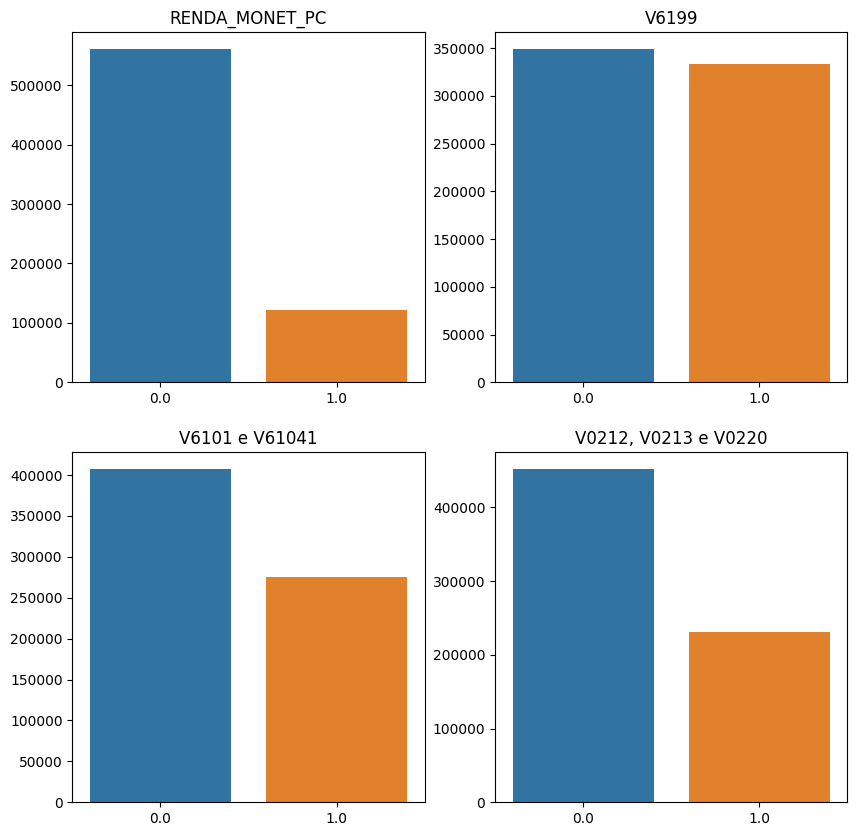

In [95]:
# grid das 4 variaveis
# plano
fig, eixos = mplt.subplots (2, 2, figsize=(10,10) )

# grafico1 = sn.countplot(MORADOR, x = 'var_depend1')
sn.countplot(base, x='rdpc', ax=eixos[0,0])
eixos[0,0].set_title('RENDA_MONET_PC')
eixos[0,0].set_xlabel('')
eixos[0,0].set_ylabel('')

# grafico2 = sn.countplot(DOMICILIO, x = 'var_depend2')
sn.countplot(base, x = 'seg_alimentar', ax=eixos[0,1])
eixos[0,1].set_title('V6199')
eixos[0,1].set_xlabel('')
eixos[0,1].set_ylabel('')

# grafico3 = sn.countplot(CONDICOES_VIDA, x = 'var_depend3')
sn.countplot(base, x = 'subjetividade', ax= eixos[1,0])
eixos[1,0].set_title('V6101 e V61041')
eixos[1,0].set_xlabel('')
eixos[1,0].set_ylabel('')

# grafico4 = sn.countplot(DOMICILIO, x = 'var_depend4')
sn.countplot(base, x = 'serv_essenciais', ax= eixos[1,1])
eixos[1,1].set_title('V0212, V0213 e V0220')
eixos[1,1].set_xlabel('')
eixos[1,1].set_ylabel('')

mplt.show()

In [ ]:
# variaveis indepentendes que serão usadas para estatisticas descritivas
# MORADOR = UF, RENDA_MONET_PC
# DOMICILIO = UF, V0212,V0213,V0220,V6199
# CONDICOES_VIDA = UF, V6101, V61041
# MORADOR_QUALI_VIDA = UF, TIPO_SITUACAO_REG,GRANDE_REGIAO,C1,C2,C3,C4

estat_morador = base[['RENDA_MONET_PC']].describe().round(2)
# estat_domicilio = DOMICILIO[['V0212','V0213','V0220','V6199']].value_counts()
# estat_condicoes_vida = CONDICOES_VIDA[['V6101','V61041']].describe().round(2)
# estat_morador_quali = MORADOR_QUALI_VIDA[['C1','C2','C3','C4']].describe().round(2)


tabela_estat = tabulate({
    "MORADOR (base)": [estat_morador.to_string()],
    # "DOMICILIO": [estat_domicilio.to_string()],
    # "CONDICOES_VIDA": [estat_condicoes_vida.to_string()],
    # "MORADOR_QUALI_VIDA": [estat_morador_quali.to_string()]
}, headers="keys", tablefmt="grid")


print(tabela_estat)

In [ ]:
# modificando nome dos UF e media salarial por estado
base['UF'] = base['UF'].map({11 : 'RO',
                               12 : 'AC',
                                13 : 'AM',
                                14 : 'RR',
                                15 : 'PR',
                                16 : 'AM',
                                17 : 'TO',
                                21 : 'MA',
                                22 : 'PI',
                                23 : 'CE',
                                24 : 'RN',
                                25 : 'PB',
                                26 : 'PE',
                                27 : 'AL',
                                28 : 'SE',
                                29 : 'BA',
                                31 : 'MG',
                                32 : 'ES',
                                33 : 'RJ',
                                35 : 'SP',
                                41 : 'PR',
                                42 : 'SC',
                                43 : 'RS',
                                50 : 'MS',
                                51 : 'MT',
                                52 : 'GO',
                                53 : 'DF'}) 

media_renda_uf = base.groupby('UF')['RENDA_MONET_PC'].mean().sort_values()
print(media_renda_uf)

In [ ]:
# analise das variaveis independentes escolhidas de cada caderno por UF
# RENDA_MONET_PC
fig, ax1 = mplt.subplots(figsize=(10,5))
sn.barplot(x = 'UF' , y = 'RENDA_MONET_PC' , data = base, ax = ax1, palette='dark' )
mplt.xlabel('Estado')
mplt.ylabel('Renda Monetária Per Capita')
mplt.show()

In [ ]:
# correlacao de pearson entre variaveis dependentes e RENDA_MONET_PC

# rdpc e RENDA_MONET_PC
# Removendo valores infinitos e ausentes
valid_indexes1 = np.isfinite(base['rdpc']) & np.isfinite(base['RENDA_MONET_PC'])
filtered_rdpc = base['rdpc'][valid_indexes1]
filtered_renda1 = base['RENDA_MONET_PC'][valid_indexes1]

# Cálculo da correlação de Pearson
correlacao1, p_valor1 = stats.pearsonr(filtered_rdpc, filtered_renda1)
print('rdpc: ',correlacao1)


# seg_alimentar e RENDA_MONET_PC
# Removendo valores infinitos e ausentes
valid_indexes2 = np.isfinite(base['seg_alimentar']) & np.isfinite(base['RENDA_MONET_PC'])
filtered_seg_alimentar = base['seg_alimentar'][valid_indexes2]
filtered_renda2 = base['RENDA_MONET_PC'][valid_indexes2]

# Cálculo da correlação de Pearson
correlacao2, p_valor2 = stats.pearsonr(filtered_seg_alimentar, filtered_renda2)
print('seg_alimentar: ',correlacao2)


# subjetividade e RENDA_MONET_PC
# Removendo valores infinitos e ausentes
valid_indexes3 = np.isfinite(base['subjetividade']) & np.isfinite(base['RENDA_MONET_PC'])
filtered_subjetividade = base['subjetividade'][valid_indexes3]
filtered_renda3 = base['RENDA_MONET_PC'][valid_indexes3]

# Cálculo da correlação de Pearson
correlacao3, p_valor3 = stats.pearsonr(filtered_subjetividade, filtered_renda3)
print('subjetividade: ',correlacao3)


# serv_essenciais e RENDA_MONET_PC
# Removendo valores infinitos e serv_essenciais
valid_indexes4 = np.isfinite(base['serv_essenciais']) & np.isfinite(base['RENDA_MONET_PC'])
filtered_serv_essenciais = base['serv_essenciais'][valid_indexes4]
filtered_renda4 = base['RENDA_MONET_PC'][valid_indexes4]

# Cálculo da correlação de Pearson
correlacao4, p_valor4 = stats.pearsonr(filtered_serv_essenciais, filtered_renda4)
print('serv_essenciais: ',correlacao4)



In [ ]:
# VARIÁVEIS INDEPENDENTES
# C4 - Nível de Instrução da pessoa (perfil do chefe)
    # 1 – Sem instrução
    # 2 – Ensino Fundamental Incompleto
    # 3 – Ensino Fundamental Completo 
    # 4 – Ensino Médio Incompleto
    # 5 – Ensino Médio Completo 
    # 6 – Ensino Superior Incompleto
    # 7 – Ensino Superior Completo

# C3 - Sexo (PERFIL DO CHEFE)
    # 1- Masculino
    # 2- Feminino

# C2 - Cor ou raça (PERFI DO CHEFE)
    # 1 – Brancos
    # 2 – Pretos e Pardos
    # 3 – Outros

# C1 - IDADE - PERFIL DO CHEFE
    # 1 – Até 24 anos
    # 2 – 25 a 49 anos
    # 3 – 50 a 64 anos
    # 4 – 65 anos ou mais

# GRANDE_REGIAO - REGIÃO (DUMY) - referência é o sudeste
    # 1- Norte
    # 2- Nordeste
    # 3- Sudeste
    # 4- Sul
    # 5- Centro-Oeste
    
# TIPO_SITUACAO_REG urbano (1) x rural (2)
    # 1 - Urbano
    # 2 - Rural


# VARIÁVEIS DEPENDENTES
# rdpc
# seg_alimentar
# subjetividade
# serv_essenciais

base_final = base[['rdpc','seg_alimentar','subjetividade','serv_essenciais', 'TIPO_SITUACAO_REG','GRANDE_REGIAO', 'C1', 'C2', 'C3', 'C4', 'RENDA_MONET_PC']]

# mapeamento das variaveis independentes
# base_final['TIPO_SITUACAO_REG'] = base_final['TIPO_SITUACAO_REG'].map({1:'Urbano', 2:'Rural'}).astype('category')      
# base_final['GRANDE_REGIAO'] = base_final['GRANDE_REGIAO'].map({1:'Não sudeste', 2:'Não sudeste', 3:'Sudeste', 4:'Não sudeste', 5:'Não sudeste'}).astype('category')   
# base_final['C1'] = base_final['C1'].map({1:'Até 24 anos', 2:'25 a 49 anos', 3:'50 a 64 anos', 4:'65 anos ou mais'}).astype('category')         
# base_final['C2'] = base_final['C2'].map({1:'Brancos', 2:'Pretos e Pardos', 3:'Outros'}).astype('category')   
# base_final['C3'] = base_final['C3'].map({1:'Masculino', 2:'Feminino'}).astype('category')   
# base_final['C4'] = base_final['C4'].map({1:'Sem instrução', 2:'Ensino Fundamental Incompleto', 3:'Ensino Fundamental Completo ', 4:'Ensino Médio Incompleto', 5:'Ensino Médio Completo ',6:'Ensino Superior Incompleto', 7:'Ensino Superior Completo' }).astype('category')    

# base_final.to_excel('base_final.xlsx')


In [ ]:
# MQO 
# https://nathaliatito.medium.com/scikit-learn-ou-statsmodels-avaliando-meu-modelo-de-regressão-f4c04b361fa7
# variaveis x (serão iguais para todos os modelos)
var_x = base_final[['TIPO_SITUACAO_REG','GRANDE_REGIAO', 'C1', 'C2','C3','C4','RENDA_MONET_PC']]

# rdpv
var_y = base_final[['rdpc']]
var_x = sm.add_constant(var_x)
modelo_rdpc = sm.OLS(var_y, var_x ).fit()
modelo_rdpc.summary() # Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel



In [ ]:
# teste de homocedasticidade usando Goldfeld-Quandt, p-valor < 0.05 indica que os dados não são homocedásticos
# homocedasticidade = variação dos resíduos é constante


###############
# O resultado do teste de Goldfeld-Quandt que você obteve é o seguinte: (0.4761528626243073, 0.9999999999999999, 'increasing'). Vamos interpretar cada um desses valores:

# O primeiro valor, 0.4761528626243073, é o valor estatístico calculado pelo teste de Goldfeld-Quandt. Esse valor é usado para avaliar a presença de heteroscedasticidade nos resíduos do modelo de regressão.

# Em geral, se o valor estiver próximo de 1, isso sugere que não há evidência significativa de heteroscedasticidade nos resíduos. No seu caso, o valor obtido é menor que 1, o que indica que há indícios de heteroscedasticidade nos resíduos do modelo.

# O segundo valor, 0.9999999999999999, é o valor p (p-value) associado ao valor estatístico. O valor p é usado para determinar se o valor estatístico é estatisticamente significativo. Nesse caso, o valor p é muito próximo de 1, o que sugere que não há evidência significativa para rejeitar a hipótese nula de ausência de heteroscedasticidade. Em outras palavras, não há evidência estatística para afirmar que a heteroscedasticidade está presente nos resíduos.

# O terceiro valor, 'increasing', indica o padrão observado na heteroscedasticidade. O termo "increasing" significa que a variância dos resíduos aumenta conforme os valores previstos (variável independente) do modelo aumentam. Isso implica que a dispersão dos erros é maior à medida que os valores previstos aumentam.
###############

teste_homo1 = sms.het_goldfeldquandt(modelo_rdpc.resid, modelo_rdpc.model.exog)  # exog indica variaveis exógenas, ou seja, faz uma matriz das variaveis independentes do modelo



In [ ]:
# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
# caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)





In [ ]:
# # transferir para excel caso nao exceda o numero de linhas
# # limite de linhas excel = 1.048.576 linhas e 16.384 colunas
# # ex: CARACTERISTICAS_DIETA.to_excel('caracteristicas_dieta.xlsx', index=False)
# # os itens de 'tabelas' e 'nome_tabelas' precisam estar alinhados

# # x
# tabelas = [ CARACTERISTICAS_DIETA,
#             CONDICOES_VIDA,
#             CONSUMO_ALIMENTAR,
#             DOMICILIO,
#             MORADOR,
#             MORADOR_QUALI_VIDA ]

# # i 
# nomes_tabelas = [   'CARACTERISTICAS_DIETA',
#                     'CONDICOES_VIDA',
#                     'CONSUMO_ALIMENTAR',
#                     'DOMICILIO',
#                     'MORADOR',
#                     'MORADOR_QUALI_VIDA' ]


# # zip serve para fazer o loop ao mesmo tempo nas minhas duas listas
# for x, i in zip(tabelas, nomes_tabelas):
    
#     if len(x) < 1048576:
#         print(f'{len(x)} , baixar: {i}')
        
#         dados = pd.DataFrame(x)
#         nome_arquivo = i +'.xlsx'
#         dados.to_excel(nome_arquivo, index=False)
        
#         print(f'arquivo {i} baixado com sucesso')
                    
#     else:
#         print(f'{len(x)} , nao baixar: {i}')
        
       
      

In [ ]:
# variaveis de cada tabela
# for x , i in zip(tabelas, nomes_tabelas):
#     dados_desc = pd.DataFrame(x).describe()
#     arquivo = pd.ExcelWriter('arquivo_estatisticas_descritivas.xlsx', engine = 'xlsxwriter')
#     dados_desc.to_excel(arquivo, sheet_name='{}'.format(i), index=True)
#     arquivo.save()

In [ ]:
# arquivos de dicionarios das variaveis
# diretorio_dic = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\dados gradilene\dados'
# diretorio_dic = diretorio_dic.replace('\\', '/')
# os.chdir(diretorio_dic)

# os.listdir()


In [ ]:
# sheets do arquivo dicionario
# from openpyxl import load_workbook
# dicionario = load_workbook('dicvar1718.xlsx')
# sheets = dicionario.sheetnames
# print(sheets) 


In [ ]:
# lendo sheet 'Morador' e mantendo apenas as variaveis 'V....'
# necessario generalizar esse codigo para cada sheet do arquivo


# morador = pd.read_excel('dicvar1718.xlsx', sheet_name='Morador')

# # cabecalho 
# morador.columns = morador.iloc[2,]

# # preenchendo elementos NAs da coluna 'Código da variável', senao a função 'startswith' nao funciona
# morador['Código da variável'].fillna('',inplace=True)

# # filtrar apenas linhas em que em 'Código da variável' o elemento começa com 'V'
# # lembrar que 'startswith' só funciona com o '.str'
# morador = morador[morador['Código da variável'].str.startswith('V')]        # filtrando apenas as linhas de codigos 'V....'
# print(morador)

In [ ]:
# generalizando codigo de ler cada sheet e filtrar apenas os codigos das variaveis
# lista_tabelas_codigos = []

# for i in sheets:
#     caderno = pd.read_excel('dicvar1718.xlsx', sheet_name=i)
#     caderno.columns = caderno.iloc[2,]
#     caderno['Código da variável'].fillna('', inplace=True)
#     caderno = caderno[caderno['Código da variável'].str.startswith('V')]
#     lista_tabelas_codigos.append(caderno)


# codigos_site = pd.concat(lista_tabelas_codigos, axis=0)
# codigos_site = codigos_site[['Código da variável', 'Descrição']]
# print(codigos_site)


In [ ]:
# vendo quantas variaveis de codigo tem em cada caderno para depois fazer o merge com a tabela 'codigos'
# lista_cadernos = [CONSUMO_ALIMENTAR, CARACTERISTICAS_DIETA, DOMICILIO, CONDICOES_VIDA, MORADOR_QUALI_VIDA , MORADOR]

# # colunas = CONSUMO_ALIMENTAR.columns.str.startswith('V')
# # CONSUMO_ALIMENTAR.columns[np.where(colunas==True)]

# codigos_total = []
# for i in lista_cadernos:
#     colunas = i.columns.str.startswith('V')
#     nome = i.columns[np.where(np.logical_and(colunas, i.columns.str.match('.*[0-9]$')))] # logical_and é pra unir as condicoes. '.*[0-9]$' é uma expressao regular
#     print(len(nome.unique()),nome)
#     codigos_total.extend(nome) # coloca na lista, parecido com append, porem append é para adicionar um unico elemento no final da lista, o extend ja adiciona tudo de uma vez
    
    
# codigos_cadernos = pd.DataFrame({'codigo':codigos_total})
# codigos_cadernos.columns = ['Código da variável']
# # codigos_cadernos.to_excel('codigos_cadernos.xlsx', index=False)

    

In [ ]:
# fazendo merge dos codigos que achei com os 207 codigos que sao o total de codigos de todos cadernos
# codigos_final = pd.merge(codigos_site, codigos_cadernos, on='Código da variável', how = 'outer')
# codigos_final = codigos_final[['Código da variável','Descrição']]
# print(codigos_final)

# codigos_final.to_excel('codigos_final.xlsx', index=False)